In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.stats.anova import AnovaRM
plt.style.use('figure.mplstyle')

from function.data2p import get_data_bis

In [2]:
# %% Setup
folder = r'D:\LW_Alldata\SI_Transient'
alldata = {'Enriched': glob(os.path.join(folder,'Enriched*.hdf5')),
           'Dissimilar': glob(os.path.join(folder,'Distinct*.hdf5')),
           'Similar': [os.path.join(folder,'Similar5_937_invivo.hdf5'),
                       os.path.join(folder,'Similar6_939_invivo.hdf5'),
                       os.path.join(folder,'Similar7_948_invivo.hdf5'),
                       os.path.join(folder,'Similar8_5454_invivo.hdf5')]}
excelfile = r'C:\Users\Hung-Ling\Desktop\MC_Results\New Results\Position decoder day.xlsx'
exps = ['Enriched','Dissimilar','Similar']
colors = ['tab:red','tab:blue','tab:green']

In [3]:
# %% Load data
c = 1  # Nov
df_list = []
for p, exp in enumerate(exps):
    df = pd.read_excel(excelfile, sheet_name=exp)
    df = df[df['Context']==1]
    df['Experiment'] = np.repeat(exp, df.shape[0])
    df_list.append(df)
    
df = pd.concat(df_list, ignore_index=True)
print(df)

      Error  Day  Context  Mouse  Experiment
0    49.850    1        1      0    Enriched
1    35.500    2        1      0    Enriched
2    35.575    3        1      0    Enriched
3    84.400    1        1      1    Enriched
4    63.100    2        1      1    Enriched
5    73.375    3        1      1    Enriched
6    35.525    1        1      2    Enriched
7    17.000    2        1      2    Enriched
8    53.850    3        1      2    Enriched
9    59.550    1        1      3    Enriched
10   68.925    2        1      3    Enriched
11   68.100    3        1      3    Enriched
12   88.525    1        1      0  Dissimilar
13   60.000    2        1      0  Dissimilar
14   42.575    3        1      0  Dissimilar
15   61.250    1        1      1  Dissimilar
16   40.125    2        1      1  Dissimilar
17   29.450    3        1      1  Dissimilar
18   77.525    1        1      2  Dissimilar
19   63.750    2        1      2  Dissimilar
20   55.500    3        1      2  Dissimilar
21  104.05

In [4]:
for p, exp in enumerate(exps):
    print('-'*20 + exp + '-'*20)
    res = pg.rm_anova(data=df_list[p], dv='Error', within='Day', subject='Mouse')
    print(res)

-------------------------Enriched-------------------------
  Source  ddof1  ddof2         F     p-unc       ng2       eps
0    Day      2      6  1.387302  0.319721  0.081703  0.936278
-------------------------Dissimilar-------------------------
  Source  ddof1  ddof2         F     p-unc       ng2       eps
0    Day      2      4  23.00362  0.006398  0.620806  0.505154
-------------------------Similar-------------------------
  Source  ddof1  ddof2         F     p-unc       ng2       eps
0    Day      2      6  1.284312  0.343337  0.053008  0.612677


In [15]:
A = df_list[1]  # Dissimilar
post_hoc = pg.pairwise_tests(data=A, dv='Error', within='Day', subject='Mouse', parametric=True, padjust='bonf')
pg.print_table(post_hoc, floatfmt='.3g')


POST HOC TESTS

Contrast      A    B  Paired    Parametric       T    dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
----------  ---  ---  --------  ------------  ----  -----  -------------  -------  --------  ----------  ------  --------
Day           1    2  True      True          4.97      2  two-sided       0.0383     0.115  bonf          3        1.28
Day           1    3  True      True          4.79      2  two-sided       0.0409     0.123  bonf          2.88     1.99
Day           2    3  True      True          4.41      2  two-sided       0.0477     0.143  bonf          2.63     0.754



C:\ProgramData\Anaconda3\envs\neurokit\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\ProgramData\Anaconda3\envs\neurokit\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
C:\ProgramData\Anaconda3\envs\neurokit\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\ProgramData\Anaconda3\envs\neurokit\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
C:\ProgramData\Anaconda3\envs\neurokit\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0,

In [13]:
A = df_list[1]  # Dissimilar
post_hoc = pg.pairwise_tukey(data=A, dv='Error', between='Day')
pg.print_table(post_hoc, floatfmt='.4g')


POST HOC TESTS

  A    B    mean(A)    mean(B)    diff     se      T    p-tukey    hedges
---  ---  ---------  ---------  ------  -----  -----  ---------  --------
  1    2      75.77      54.62   21.14  10.74  1.968     0.2008    1.279
  1    3      75.77      42.51   33.26  10.74  3.096     0.0483    1.989
  2    3      54.62      42.51   12.12  10.74  1.128     0.5332    0.7536



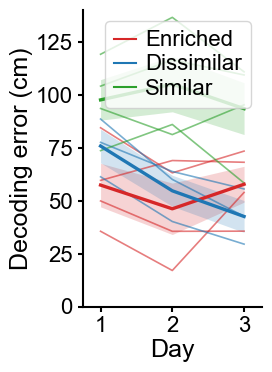

In [9]:
# %% Plot
nday = len(set(df['Day']))
fig, ax = plt.subplots(figsize=(3,4))
for p, exp in enumerate(exps):
    A = df[df['Experiment']==exp]
    n_mice = len(set(A['Mouse']))
    for m in range(n_mice):
        a = A[A['Mouse']==m]['Error']
        ax.plot(np.arange(1,nday+1), a, c=colors[p], alpha=0.6, lw=1.2)
sns.lineplot(df, x='Day', y='Error', hue='Experiment', palette=colors, lw=2.4,
             errorbar='se', err_style='band',  # err_style='bars'
             err_kws=dict(lw=0))  # err_kws=dict(elinewidth=2, capthick=2, capsize=4))
ax.set(xlim=[0.75,3.25], ylim=[0,140], ylabel='Decoding error (cm)')
ax.legend(loc='best')
fig.tight_layout()
fig.savefig('Decode position day.svg')

## Stability (spatial information)

In [10]:
day = [1,2,3]  # Recording days, None for all days
min_rate = 1/60  # Minimum transient rate for active cells
nday = len(day)
si_list = []

for p, exp in enumerate(exps):
    
    datapaths = alldata[exp]
    si_nov = []
    for m, datapath in enumerate(datapaths):
        data, cells, days, ctx, _ = get_data_bis(datapath, day=day, min_rate=min_rate)
        si_nov.append(cells['si_unbiased'][:,1::2].T)  # Nov
    si_nov = np.hstack(si_nov)
    si_nov = si_nov[:,np.all(np.isfinite(si_nov),axis=0)]
    si_list.append(si_nov)
    
    print('-'*16 + exp + '-'*16)
    print('Day1-2 correlation r=%.4g p=%.4g' % stats.pearsonr(si_nov[0], si_nov[1]))
    print('Day2-3 correlation r=%.4g p=%.4g' % stats.pearsonr(si_nov[1], si_nov[2]))

----------------Enriched----------------
Day1-2 correlation r=0.2267 p=0.000329
Day2-3 correlation r=0.3299 p=1.106e-07
----------------Dissimilar----------------
Day1-2 correlation r=0.2186 p=0.02435
Day2-3 correlation r=0.555 p=6.662e-10
----------------Similar----------------
Day1-2 correlation r=-0.05853 p=0.4057
Day2-3 correlation r=-0.03182 p=0.6514


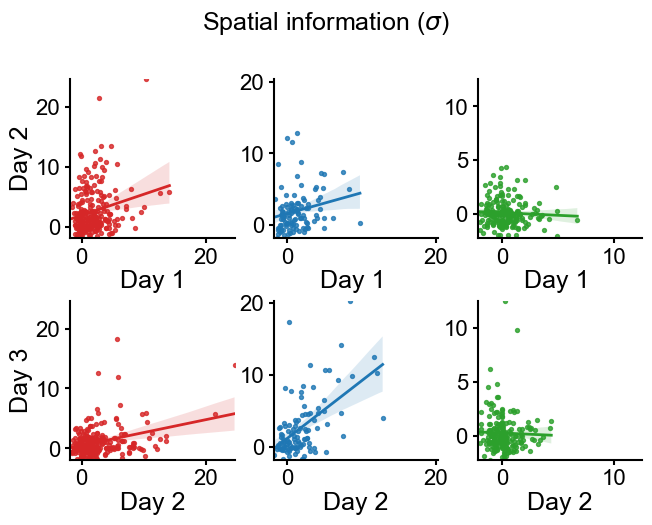

In [13]:
fig, axs = plt.subplots(2,3,figsize=(6.8,5.4))
fig.suptitle('Spatial information ($\sigma$)')
for p, si in enumerate(si_list):
    rmax, rmin = np.max(si), np.min(si)
    df12 = pd.DataFrame(si[0:2].T, columns=['D1','D2'])
    sns.regplot(df12, x='D1', y='D2', ax=axs[0,p], color=colors[p], scatter_kws=dict(s=8), line_kws=dict(lw=2))
    df23 = pd.DataFrame(si[1:3].T, columns=['D2','D3'])
    sns.regplot(df23, x='D2', y='D3', ax=axs[1,p], color=colors[p], scatter_kws=dict(s=8), line_kws=dict(lw=2))
    axs[0,p].set(xlim=[rmin,rmax], ylim=[rmin,rmax])
    axs[1,p].set(xlim=[rmin,rmax], ylim=[rmin,rmax])
for ax in axs.ravel():
    ax.set(xlabel='', ylabel='')
axs[0,0].set(xlabel='Day 1', ylabel='Day 2')
axs[0,1].set(xlabel='Day 1 ')
axs[0,2].set(xlabel='Day 1 ')
axs[1,0].set(xlabel='Day 2', ylabel='Day 3')
axs[1,1].set(xlabel='Day 2')
axs[1,2].set(xlabel='Day 2')
axs[0,1].set(xlabel='Day 1 ')
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.24)
fig.savefig('Stability position.svg')